In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import datetime,timedelta
import time
import seaborn as sns
sns.set()

In [2]:
df_2010 = pd.read_csv('../data/shooting/curry-2009-2019/curry-2010.csv')
df_2011 = pd.read_csv('../data/shooting/curry-2009-2019/curry-2011.csv')
df_2012 = pd.read_csv('../data/shooting/curry-2009-2019/curry-2012.csv')
df_2013 = pd.read_csv('../data/shooting/curry-2009-2019/curry-2013.csv')
df_2014 = pd.read_csv('../data/shooting/curry-2009-2019/curry-2014.csv')
df_2015 = pd.read_csv('../data/shooting/curry-2009-2019/curry-2015.csv')
df_2016 = pd.read_csv('../data/shooting/curry-2009-2019/curry-2016.csv')
df_2017 = pd.read_csv('../data/shooting/curry-2009-2019/curry-2017.csv')
df_2018 = pd.read_csv('../data/shooting/curry-2009-2019/curry-2018.csv')
df_2019 = pd.read_csv('../data/shooting/curry-2009-2019/curry-2019.csv')
def_rating = pd.read_csv('../data/defensive-rating/tm-defrtg-avg-2009-2019.csv',index_col=0)

In [3]:
df_all = pd.concat([df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019], axis=0)
df_all = df_all.drop(['x', 'y', 'shot_description', 'game_score'], axis=1)

# dates from the 'date' col aren't datetime, so convert them to
df_all['date'] = pd.to_datetime(df_all['date'])

In [4]:
df_all.groupby('date')['shot_made'].count() # shots attempted

date
2009-10-28    12
2009-10-30     9
2009-11-04     6
2009-11-06     5
2009-11-08     8
              ..
2019-06-02    16
2019-06-05    31
2019-06-07    22
2019-06-10    23
2019-06-13    14
Name: shot_made, Length: 804, dtype: int64

In [5]:
df_all.groupby('date')['shot_made'].sum() # shots made

date
2009-10-28     7.0
2009-10-30     5.0
2009-11-04     3.0
2009-11-06     1.0
2009-11-08     4.0
              ... 
2019-06-02     6.0
2019-06-05    14.0
2019-06-07     9.0
2019-06-10    10.0
2019-06-13     6.0
Name: shot_made, Length: 804, dtype: float64

In [6]:
df_all.groupby(['date', 'quarter'])['shot_made'].count() # shot attempts per quarter

date        quarter
2009-10-28  1          3
            2          3
            4          6
2009-10-30  1          2
            2          2
                      ..
2019-06-10  4          6
2019-06-13  1          2
            2          3
            3          4
            4          5
Name: shot_made, Length: 2978, dtype: int64

In [7]:
df_all.groupby(['date', 'quarter'])['shot_made'].sum() # shots made per quarter

date        quarter
2009-10-28  1          1.0
            2          0.0
            4          6.0
2009-10-30  1          1.0
            2          2.0
                      ... 
2019-06-10  4          2.0
2019-06-13  1          1.0
            2          1.0
            3          3.0
            4          1.0
Name: shot_made, Length: 2978, dtype: float64

In [8]:
test_df = df_all
test_df.head(30)

,date,home,vs,quarter,time_left,shot_made,shot_value,shot_distance
0,2009-10-28,True,HOU,1,11:25,False,3,27
1,2009-10-28,True,HOU,1,09:31,True,2,19
2,2009-10-28,True,HOU,1,06:02,False,2,14
3,2009-10-28,True,HOU,2,09:49,False,2,19
4,2009-10-28,True,HOU,2,02:19,False,2,16
5,2009-10-28,True,HOU,2,00:34,False,2,4
6,2009-10-28,True,HOU,4,10:26,True,2,16
7,2009-10-28,True,HOU,4,06:31,True,2,17
8,2009-10-28,True,HOU,4,02:25,True,2,20
9,2009-10-28,True,HOU,4,01:47,True,2,18


In [9]:
# CUMULATIVE SHOTS AND ATTEMPTS
# cumsum by date help from https://stackoverflow.com/a/51854277
cum_shot_made = df_all.groupby(df_all['date'].dt.date)['shot_made'].cumsum()
# cum_shot_mades

cum_attempts = df_all.groupby(df_all['date'].dt.date)['shot_made'].cumcount()
cum_attempts = cum_attempts + 1

In [10]:
df_all['cum_shot_made'] = cum_shot_made
df_all['cum_attempts'] = cum_attempts
df_all['cum_fg_percent'] = df_all['cum_shot_made'] / df_all['cum_attempts']

In [11]:
# GET GAME TIME
def strToDatetime(string):
    return datetime.strptime(string, '%M:%S')

df_all['time_left'] = df_all['time_left'].apply(strToDatetime)
df_all['game_time'] = pd.to_datetime(df_all['time_left'], format='%H:%M')
df_all['game_time'] = pd.to_timedelta(df_all['game_time'] - pd.datetime(1900, 1, 1))
#Convert to Minutes
df_all['game_time'] = df_all['game_time'].dt.total_seconds() / 60
df_all['game_time'] = df_all['quarter'] * 12 - df_all['game_time']

In [12]:
# DROP CURRY'S CURRENT TEAM
def drop_team(df,team):
    return df.drop([team]) #DROP PLAYERS OWN TEAM 

def_rating = drop_team(def_rating,'Golden State Warriors')

In [13]:
# REORDER DF COLS
df_all = df_all[["date",'home','vs','quarter','time_left', 'game_time', 'shot_made', 'cum_shot_made', 'cum_attempts', 'cum_fg_percent', 'shot_value', 'shot_distance']]
# df_final.head()

In [14]:
df_all

,date,home,vs,quarter,time_left,game_time,shot_made,cum_shot_made,cum_attempts,cum_fg_percent,shot_value,shot_distance
0,2009-10-28,True,HOU,1,1900-01-01 00:11:25,0.583333,False,0.0,1,0.000000,3,27
1,2009-10-28,True,HOU,1,1900-01-01 00:09:31,2.483333,True,1.0,2,0.500000,2,19
2,2009-10-28,True,HOU,1,1900-01-01 00:06:02,5.966667,False,1.0,3,0.333333,2,14
3,2009-10-28,True,HOU,2,1900-01-01 00:09:49,14.183333,False,1.0,4,0.250000,2,19
4,2009-10-28,True,HOU,2,1900-01-01 00:02:19,21.683333,False,1.0,5,0.200000,2,16
...,...,...,...,...,...,...,...,...,...,...,...,...
1745,2019-06-13,True,TOR,4,1900-01-01 00:07:30,40.500000,False,5.0,10,0.500000,2,12
1746,2019-06-13,True,TOR,4,1900-01-01 00:06:00,42.000000,True,6.0,11,0.545455,2,20
1747,2019-06-13,True,TOR,4,1900-01-01 00:05:32,42.466667,False,6.0,12,0.500000,3,26
1748,2019-06-13,True,TOR,4,1900-01-01 00:04:03,43.950000,False,6.0,13,0.461538,3,25


In [15]:
#EXTRACT THEIR RANKINGS 
top_def = def_rating.iloc[0:10]
mid_def = def_rating.iloc[10:19]
bot_def = def_rating.iloc[19:30]

In [16]:
#SUBSET DATAFRAME TO TOP, MID, BOTTOM TIER
top_def_DF = df_all[df_all['vs'].isin(top_def['Acronym'].values)]
mid_def_DF = df_all[df_all['vs'].isin(mid_def['Acronym'].values)]
bot_def_DF = df_all[df_all['vs'].isin(bot_def['Acronym'].values)]

In [17]:
df_all.to_csv('../data/shot-data-all.csv')
top_def_DF.to_csv('../data/top-def.csv')
mid_def_DF.to_csv('../data/mid-def.csv')
bot_def_DF.to_csv('../data/bot-def.csv')

In [18]:
warriors_palette = ['#006BB6', '#FDB927', '#26282A']
sns.set_palette(sns.color_palette(warriors_palette))

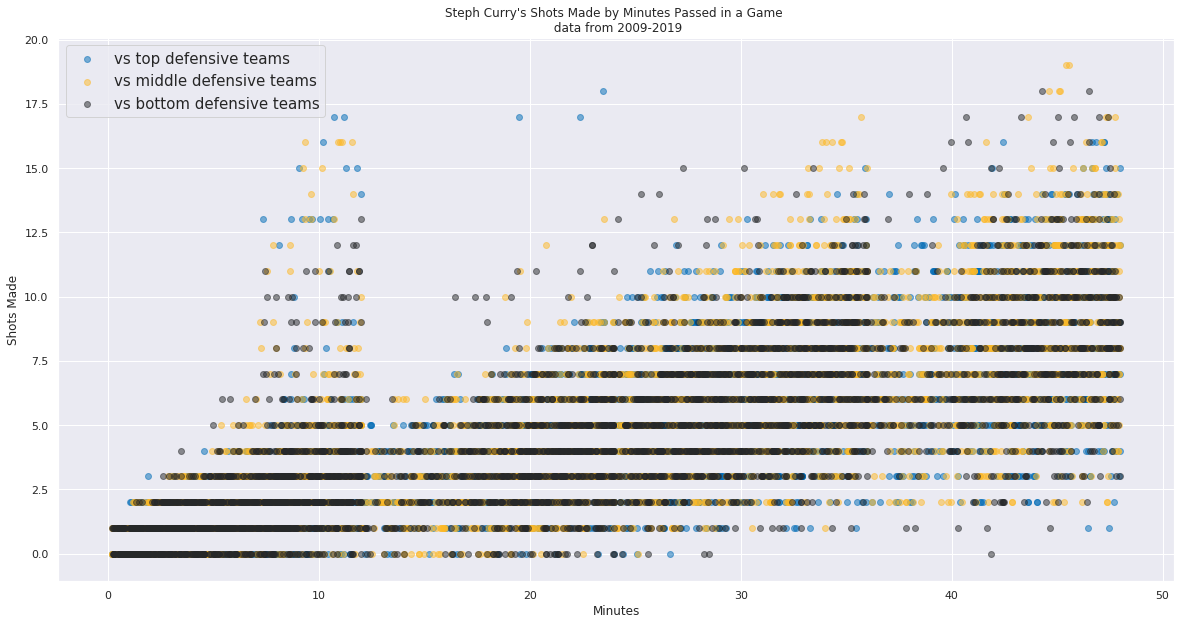

In [25]:
plt.subplots(figsize=(20,10))
plt.scatter(top_def_DF['game_time'],top_def_DF['cum_shot_made'],alpha = 0.5, label='vs top defensive teams')
plt.scatter(mid_def_DF['game_time'],mid_def_DF['cum_shot_made'],alpha = 0.5, label='vs middle defensive teams')
plt.scatter(bot_def_DF['game_time'],bot_def_DF['cum_shot_made'],alpha = 0.5, label='vs bottom defensive teams')
plt.legend(loc='best', prop={'size': 15})
plt.title('Steph Curry\'s Shots Made by Minutes Passed in a Game \n data from 2009-2019')
plt.xlabel('Minutes')
plt.ylabel('Shots Made')
# plt.show()
plt.savefig('../figures/curry-shots-made-by-minutes.png')

In [20]:
trial = top_def_DF[(top_def_DF['cum_shot_made'] > 9) & (top_def_DF['game_time'] < 1)]

In [21]:
#top_def_DF[(top_def_DF['date'] == '2013-03-01') | (top_def_DF['date'] == '2013-02-26')]

In [22]:
#TRIAL AND ERROR FOR cum_shot_made
# derp2 = df_all.groupby(df_all['date'].dt.date)['shot_made'].cumsum()
# derp3 = df_all
# derp3['cum_shot_made_fixed'] = derp2
# # test
# derp3
# plt.subplots(figsize=(20,10))
# plt.scatter(derp3['game_time'], derp3['cum_shot_made_fixed'])

In [23]:
#USING 2018-2019 as our validation 
#USING 2009-2017 FOR TRAINING
filter_2019 = top_def_DF[(top_def_DF['date'] <= '2017-12-31')]
with_2019 = top_def_DF[(top_def_DF['date'] > '2017-12-31')]

In [24]:
df_all

,date,home,vs,quarter,time_left,game_time,shot_made,cum_shot_made,cum_attempts,cum_fg_percent,shot_value,shot_distance
0,2009-10-28,True,HOU,1,1900-01-01 00:11:25,0.583333,False,0.0,1,0.000000,3,27
1,2009-10-28,True,HOU,1,1900-01-01 00:09:31,2.483333,True,1.0,2,0.500000,2,19
2,2009-10-28,True,HOU,1,1900-01-01 00:06:02,5.966667,False,1.0,3,0.333333,2,14
3,2009-10-28,True,HOU,2,1900-01-01 00:09:49,14.183333,False,1.0,4,0.250000,2,19
4,2009-10-28,True,HOU,2,1900-01-01 00:02:19,21.683333,False,1.0,5,0.200000,2,16
...,...,...,...,...,...,...,...,...,...,...,...,...
1745,2019-06-13,True,TOR,4,1900-01-01 00:07:30,40.500000,False,5.0,10,0.500000,2,12
1746,2019-06-13,True,TOR,4,1900-01-01 00:06:00,42.000000,True,6.0,11,0.545455,2,20
1747,2019-06-13,True,TOR,4,1900-01-01 00:05:32,42.466667,False,6.0,12,0.500000,3,26
1748,2019-06-13,True,TOR,4,1900-01-01 00:04:03,43.950000,False,6.0,13,0.461538,3,25
